# INFSCI0510 Data Analysis, Department of Computer Science, SCUPI
# Assignment 1: Binary Classification and Cross-Validation


In this assignment, you will implement three different machine learning models, under the cross-validation strategy:
- Perceptron
- Logistic Regression
- K-Nearest Neighbors (KNN)

The goal is to implement and analyze these three models under cross-validation strategy. </br>

## Data files for this assignment
In order to get hand on the assignment, you have to download the data files and allocate them into the correct directory as follows:

```
├──[your working directory]
   └── diabetes.data
```

**Please make sure to use the correct path to these files when working on your own machine. Recall that the jupyter *.ipynb file (this assignment file) should be in your working directory.**

We will use the Diabetes dataset from the UCI Machine Learning Repository (file *diabetes.data*). Our goal is to predict if patients will test positive for diabetes given 8 features including age and blood pressure. For more details on the dataset see: https://www.kaggle.com/uciml/pima-indians-diabetes-database

## <font color='red'>Exercise 1: Data Loading and Pre-Processing (15 marks)</font>
<!-- - For reproduction purposes, please set the seed of numpy random generator with 2025. (5 marks) -->
- Import the data file (_diabetes.data_) into a Pandas dataframe. Standardize the features using _sklearn.preprocessing.StandardScaler_ (5 marks) </br>
- Use _sklearn.model_selection_._train_test_split_, split the data with train-test ratio 9:1, for reproduction please set the _random_state_ with 2025. (5 marks) </br>

**Note:** In _diabetes.data_, the last column corresponds to the class label: 1 for the positive class and 0 for the negative class. </br>
**Note:** The _diabetes.data_ file has no header. By default, Pandas will read the first row of a _.data_ file as the column name. This behaviour can be disabled by modifying the header argument. See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html </br>
**Note:** Fail to set the _random_state_ with 2025 in train-test split will lose the marks.

In [8]:
# Import diabetes dataset(5 marks)
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold

data = pd.read_csv("diabetes.data",header = None)
X = data.iloc[:, :-1].values
y = np.where(data.iloc[:, -1].values == 1, 1, 0)

# Standardize features (5 marks)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.1, random_state = 2025)

- Based on our two classes, i.e.,  the negative class and the positive class, write a function that takes as input your predicted targets and the true targets (i.e., the ground truth), and computes the *Accuracy* of the classifier. (5 marks)

The calculation of *Accuracy* is denoted as follows:

\begin{equation*}
 Accuracy = \frac{TP + TN}{TOTAL},
\end{equation*}

where $TP$ = No. of True Positives (model predicts positive and true value is positive), $TN$ = No. of True Negatives (model predicts negative and true value is negative), and $TOTAL$ = No. of all samples.

In [9]:
# Implement the function to compute accuracy (5 marks)
def cal_accuracy(true, pred):
    total = len(true)
    tp = 0
    tn = 0
    for i in range(total):
        if true[i] == 1 and pred[i] == 1:
            tp += 1
        if true[i] == -1 and pred[i] == -1:
            tn += 1
    return (tp + tn) / total

## <font color='red'>Exercise 2: The Classifiers (45 marks)</font>

- Implement the perceptron model, select the one attaining the best accuracy based on a 10-fold cross-validation strategy, report the classification accuracy on the test set. (15 marks)
- Implement the logistic regression, select the one attaining the best accuracy based on a 10-fold cross-validation strategy, report the classification accuracy on the test set. (15 marks)
- Implement the KNN, select the one attaining the best accuracy based on a 10-fold cross-validation strategy, report the classification accuracy on the test set. (15 marks)

**Note:** _sklearn.model_selection.KFold_ may help you to implement the k-fold validation. For reproduction, please set _shuffle_ to _True_, and _random_state_ to 2025, fail to do so will lead to marks deducted. </br>
**Note:** For reproduction, please also set the seed of _numpy_ random generator with 2025. Each time you import the _numpy_ library, you need to reset the seed, fail to do so will lead to marks deducted. </br>
**Note:** While it is difficult to guarantee perfect classification, try to optimize the model with optimal errors as much as possible. </br>
**Note:** You need to implement perceptron and logistic regression from scratch, DO NOT use pre-built libraries (e.g., `scikit-learn`'s `Perceptron`), fail to do so will lead to marks deducted. </br>
**Note:** However, for KNN, pre-built libraries such as _sklearn.neighbors.KNeighborsClassifier_ can be applied. </br>
**Note:** Use the accuracy function that you previously implemented to evaluate the accuracy of these classifiers. DO NOT use built-in functions like `accuracy_score` from `sklearn.metrics`, fail to do so will lead to marks deducted.

In [11]:
# The perceptron model (15 marks)
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold

np.random.seed(2025)

data = pd.read_csv("diabetes.data",header = None)
X = data.iloc[:, :-1].values
y = np.where(data.iloc[:, -1].values == 1, 1, 0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.1, random_state = 2025)

def cal_accuracy(true, pred):
    total = len(true)
    tp = 0
    tn = 0
    for i in range(total):
        if true[i] == 1 and pred[i] == 1:
            tp += 1
        if true[i] == 0 and pred[i] == 0:
            tn += 1
    return (tp + tn) / total

class Perceptron:
    def __init__(self, learning_rate = 0.01, max_iter = 1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = 0.0

    def fit(self, X, y):
        samples_num, features_num = X.shape
        self.weights = np.zeros(features_num)
        self.bias = 0
        best_error = float('inf')
        no_improve = 0
        for epoch in range(self.max_iter):
            errors = 0
            for i in range(samples_num):
                output = np.dot(X[i], self.weights) + self.bias
                y_pred = 1 if output >= 0 else 0
                if y_pred != y[i]:
                    errors += 1
                    self.weights += self.learning_rate * (y[i] - y_pred) * X[i]
                    self.bias += self.learning_rate * (y[i] - y_pred)
                    
            #if epoch % 100 == 0:
                #print(f"Epoch {epoch}, Errors: {errors}")
                
    def predict(self, X):
        output = np.dot(X, self.weights) + self.bias
        return np.where(output >= 0, 1, 0)

kf = KFold(n_splits = 10, shuffle = True, random_state = 2025)

best_accuracy = 0
best_model = None
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    perceptron = Perceptron(learning_rate=0.01, max_iter=1000)
    perceptron.fit(X_train_fold, y_train_fold)
    y_pred = perceptron.predict(X_val_fold)
    accuracy = cal_accuracy(y_val_fold, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = perceptron

test_pred = best_model.predict(X_test)
test_accuracy = cal_accuracy(y_test, test_pred)

#print("The best accuracy of the perceptron model on the validation set:", best_accuracy)
print("Accuracy of the perceptron model on the test set:", test_accuracy)

Accuracy of the perceptron model on the test set: 0.7402597402597403


In [2]:
# The logistic regression model (15 marks)
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold

np.random.seed(2025)

data = pd.read_csv("diabetes.data",header = None)
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values.astype(float)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.1, random_state = 2025)

def cal_accuracy(true, pred):
    total = len(true)
    tp = 0
    tn = 0
    for i in range(total):
        if true[i] == 1 and pred[i] == 1:
            tp += 1
        if true[i] == 0 and pred[i] == 0:
            tn += 1
    return (tp + tn) / total

class LogisticRegression:
    def __init__(self, learning_rate = 0.01, max_iter = 10000, tol = 1e-4):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.weights = None
        self.bias = 0.0
        
    def sigmoid(self, x):
        x = np.clip(x, -500, 500)
        return 1/(1 + np.exp(-x))
        
    def fit(self, X, y):
        samples_num, features_num = X.shape
        self.weights = np.zeros(features_num)
        #prev_loss = float('inf')
        self.bias = 0
        for epoch in range(self.max_iter):
            output = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(output)
            loss = -np.mean(y * np.log(y_pred - 1e-10) + (1 - y) * np.log(1 - y_pred + 1e-10))
            #if abs(prev_loss - loss) < self.tol:
                #print(f"Converged at epoch {epoch}")
                #break
            #prev_loss = loss
            dw = (1 / samples_num) * np.dot(X.T, (y_pred - y))
            db = np.mean(y_pred - y)
            self.weights = self.weights - (self.learning_rate * dw)
            self.bias = self.bias - (self.learning_rate * db)
            #if epoch % 100 == 0:
                #print(f"已迭代{epoch}次,当前w为{self.weights},当前bias为{self.bias}，当前loss为{loss}")
                
    def predict(self, X, t = 0.5):
        output = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(output)
        return np.where(y_pred >= t, 1, 0)

kf = KFold(n_splits = 10, shuffle = True, random_state = 2025)

best_accuracy = 0
best_model = None
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    logisticRegression = LogisticRegression(learning_rate = 0.01, max_iter = 10000)
    logisticRegression.fit(X_train_fold, y_train_fold)
    y_pred = logisticRegression.predict(X_val_fold)
    accuracy = cal_accuracy(y_val_fold, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = logisticRegression

test_pred = best_model.predict(X_test)
test_accuracy = cal_accuracy(y_test, test_pred)

#print("Best accuracy of logistic regression model on validation set:", best_accuracy)
print("Accuracy of the logistic regression model on the test set:", test_accuracy)

Accuracy of the logistic regression model on the test set: 0.7792207792207793


In [13]:
# The KNN model (15 marks)
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold

np.random.seed(2025)

data = pd.read_csv("diabetes.data",header = None)
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.1, random_state = 2025)

def cal_accuracy(true, pred):
    total = len(true)
    tp = 0
    tn = 0
    for i in range(total):
        if true[i] == 1 and pred[i] == 1:
            tp += 1
        if true[i] == 0 and pred[i] == 0:
            tn += 1
    return (tp + tn) / total

kf = KFold(n_splits = 10, shuffle = True, random_state = 2025)
best_accuracy = 0
best_params = {'k': 1, 'weights': 'uniform', 'p': 2}

param_grid = {'k': range(1, 21), 'weights': ['uniform', 'distance'], 'p': [1,2]}

for k in param_grid['k']:
    for weight in param_grid['weights']:
        for p in param_grid['p']:
            knn = KNeighborsClassifier(n_neighbors = k, weights = weight, p = p)
            accuracy_list = []
            for train_index, val_index in kf.split(X_train):
                X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
                y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
                knn.fit(X_train_fold, y_train_fold)
                y_pred = knn.predict(X_val_fold)
                accuracy = cal_accuracy(y_val_fold, y_pred)
                accuracy_list.append(accuracy)
            mean_accuracy = np.mean(accuracy_list)
            if mean_accuracy > best_accuracy:
                best_accuracy = mean_accuracy
                best_params = {'k':k, 'weights': weight, 'p':p}

best_knn = KNeighborsClassifier(n_neighbors = best_params['k'], weights = best_params['weights'], p = best_params['p'])
best_knn.fit(X_train, y_train)
test_predict = best_knn.predict(X_test)
test_accuracy = cal_accuracy(test_predict, y_test)

print(f"best k value: {best_params['k']} weights: {best_params['weights']} p: {best_params['p']}")
print(f"Accuracy of the KNN model on the test set: {test_accuracy:}")

best k value: 19 weights: distance p: 1
Accuracy of the KNN model on the test set: 0.7662337662337663


## <font color='red'>Exercise 3: Hyperparameter Settings (40 marks)</font>
Although you have implemented these three different cassifiers, there are several questions still remained to address:

- Using Markdown text, please list the hyperparameters involved in each classifier. (10 marks)
- Justify the value choices of these hyperparameters. (25 marks)
- Compare between the test accuracies of the three classifiers, please explain the performance similarities/variances. (5 marks)

# List hyperparameters (10 marks)
### 1.Perceptron  
1. Learning Rate `learning_rate`   
Control the step size of the weight update.
  
2. Max Iteratioins `max_iter`  
Limit the number of training rounds to prevent infinite loops.
  
### 2.Logistic Regression  
1. Learning Rate `learning_rate`  
Control the step size of gradient descent.
  
2. Max Iteratioins `max_iter`  
Limit the number of training rounds to prevent infinite loops.
  
### 3.KNN  
1. N Neighbors `param_grid['k']`  
Number of nearest neighbor samples for voting reference. Determine model complexity.

2. Weight Type `param_grid['weight']`  
There are two modes: **Uniform** is equal voting, and **Distance** is distance weighted voting.

3. Distance metric `param_grid['p']`  
There are two distance metric: **1** means Manhattan Distance, and **2** means Euclidean Distance.

# Hyperparameter values (25 marks)  
### 1.Perceptron
1. Learning Rate `learning_rate = 0.01`  
I choose 0.01 as the learning rate. If the learning rate is too high (lr > 1), it may cause weight update oscillations and fail to converge. If the learning rate is too low (lr < 0.001), the convergence speed will be slow and more iterations will be required.
  
2. Max Iteratioins `max_iter = 1000`  
I choose 10000 as the maximum number of iterations. Due to engineering considerations, there are 768 data points in the dataset, which is usually set to 500-1000 iterations. In addition, the number of iterations is also related to the learning rate. Because my learning rate is low, a larger maximum number of iterations can ensure that the global optimum can be found. So I choose 1000 iterations.

### 2.Logistic Regression  
1. Learning Rate `learning_rate = 0.01`  
I choose 0.01 as the learning rate. The logarithmic loss function is a convex function, but the curvature is affected by the characteristic scale. Under standardized data, 0.01 is the safe starting point, and a learning rate that is too high may miss the global optimum, so I set the learning rate to 0.01.

2. Max Iteratioins `max_iter = 10000`  
The maximum number of iterations in logistic regression is usually between 1000-10000, so I chose 10000 as the number of iterations beacuse the optimization goal of logistic regression is a convex function, and the larger the number of iterations, the closer it will be to the global optimum..

3. Threshold `t = 0.5`  
The classification threshold is usually set to 0.5 by default, based on the Bayesian optimal classifier.

### 3.KNN  
1. N Neighbors `param_grid['k'] = 19`  
I chose 19 as the k value because changes in k value directly affect the structure of the model. Therefore, I conducted k-fold validation for k values ranging from 1 to 21 and calculated the average accuracy for each iteration. Finally, I selected the k value with the highest accuracy, which is k=19.

2. Weight Type `param_grid['weight'] = 'distance'`  
I choose to use distance weighting. Similar to the selection of k, the accuracy of distance weighted test set is higher after the test comparison of two weighting methods.

3. Distance metric `param_grid['p'] = 1`  
I choose to use Manhattan distance. Similar to the selection of k, the test set using Manhattan distance has a higher accuracy after the test comparison of two distances.

# Performance comparison and discussion (5 marks)
After training, the accuracy of the three models on the test set is as follows:  
|Model Name|Accuracy on the test set|Performance difference analysis|
|------|------|------|
|Perceptron|0.7403|Lagging behind|
|Logistic Regression|0.7792|Slightly lower than logical regression|
|KNN|0.7662|Best performance|  

### 1. KNN vs Logistic Regression  

Similarity: Both of them reached 76%+ accuracy, indicating that diabetes data is separable, but not strictly linear separable.  

Difference: 1.3% higher in logistic regression. I think possible causes is better generalization capability (KNN is vulnerable to local noise). And there is a linear relationship between features (the core hypothesis of logical regression).

### 2. Reasons for Perceptron's significant backwardness  

Perceptron requires data to be strictly linearly separable, while PCA visual display shows that the data set is not strictly linearly separable. We can further verify it by calculating the linear classifier accuracy. Accuracy of classifier accuracy is 0.77 ± 0.02, which means that the dataset may be partially linear separable and partially nonlinear separable, so the performance of the perceptron on this dataset is not as good as the other two.

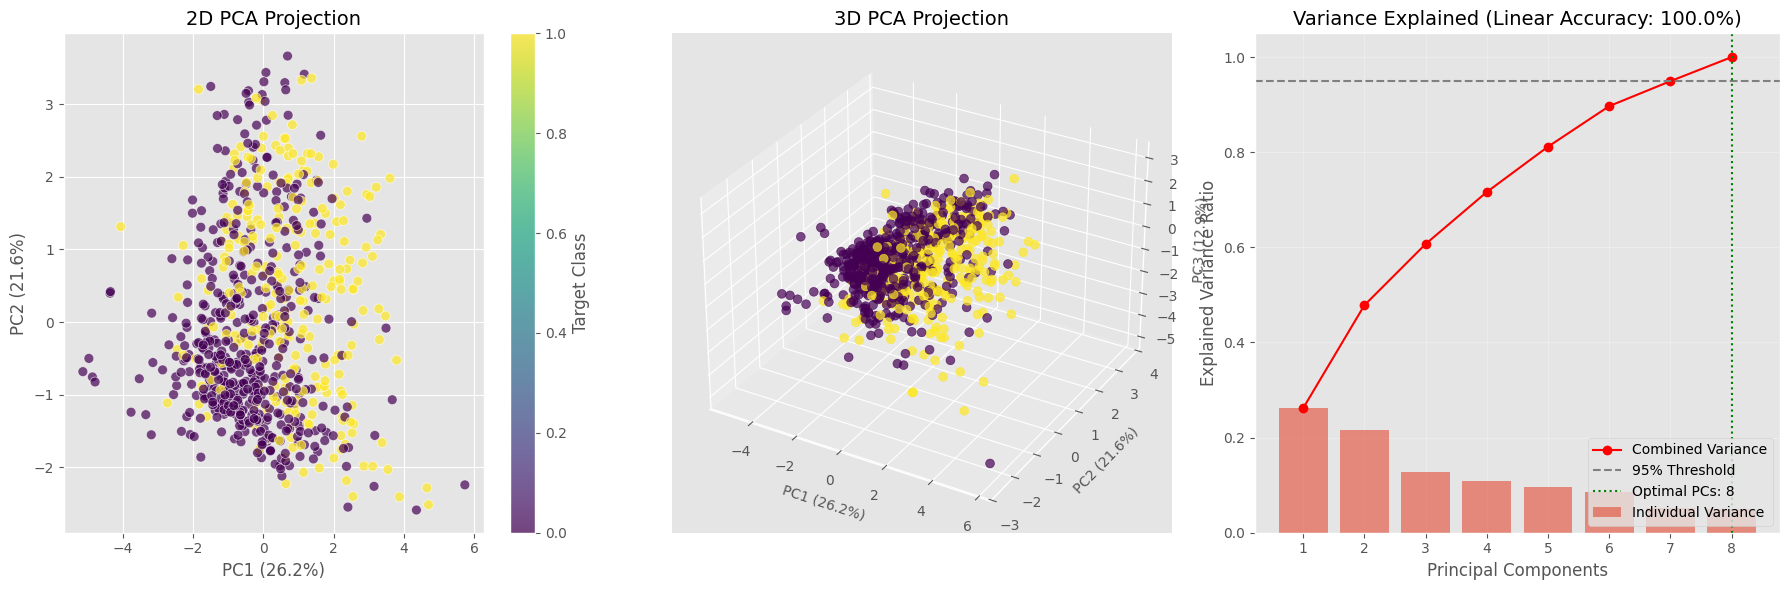

Accuracy of linear classifier: 0.77 ± 0.02


In [3]:
# PCA visual display & Accuracy of classifier accuracy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

data = pd.read_csv("diabetes.data", header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
linear_accuracy = cumulative_variance[n_components_95 - 1]

plt.style.use('ggplot')
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(131)
scatter = ax1.scatter(X_pca[:, 0], X_pca[:, 1], 
                     c=y, cmap='viridis', alpha=0.7, 
                     edgecolor='w', s=50)

ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
ax1.set_title('2D PCA Projection', fontsize=14)
plt.colorbar(scatter, label='Target Class')

ax2 = fig.add_subplot(132, projection='3d')
scatter_3d = ax2.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                        c=y, cmap='viridis', alpha=0.7,
                        s=40, depthshade=False)

ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=10)
ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=10)
ax2.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]*100:.1f}%)', fontsize=10)
ax2.set_title('3D PCA Projection', fontsize=14)

ax3 = fig.add_subplot(133)
bars = ax3.bar(range(1, len(pca.explained_variance_ratio_)+1),
              pca.explained_variance_ratio_,
              alpha=0.6, label='Individual Variance')

line = ax3.plot(range(1, len(cumulative_variance)+1),
               cumulative_variance,
               'ro-', label='Combined Variance')

ax3.axhline(0.95, color='gray', linestyle='--', label='95% Threshold')
ax3.axvline(n_components_95, color='green', linestyle=':', 
           label=f'Optimal PCs: {n_components_95}')

ax3.set_xlabel('Principal Components', fontsize=12)
ax3.set_ylabel('Explained Variance Ratio', fontsize=12)
ax3.set_title(f'Variance Explained (Linear Accuracy: {linear_accuracy*100:.1f}%)', fontsize=14)
ax3.legend(loc='lower right')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

model = LogisticRegression()
scores = cross_val_score(model, X_scaled, y, cv=5)
print(f"Accuracy of linear classifier: {scores.mean():.2f} ± {scores.std():.2f}")

### 3. Comparison of model features

|Character|Perceptron|Logistic Regression|KNN|
|------|-----|------|------|
|Model Type|Linear|Linear + Probability|Nonlinear|
|Decision boundary|Straight line|Probability threshold|Local polygon|
|Sensitivity to noise|High|Medium|High|
|Suitable for data distribution|Strictly linearly separable|Approximately linearly separable|Complex nonlinearity|

## <font color='blue'>Submission</font>
Please submit the .ipynb file with your answer, and rename the file as _A1-[Section Number]-[Student ID]-[Your name]_. </br>
For example, _A1-01-2023141520000-Sophia.ipynb_